In [2]:
import numpy as np
import matplotlib.pyplot as plt

Enter the dimensions of the room: 
5 6
Room layout:
 [[0. 3. 0. 8. 0. 2.]
 [2. 0. 0. 0. 0. 0.]
 [6. 0. 0. 0. 0. 7.]
 [0. 0. 0. 0. 7. 0.]
 [0. 6. 5. 8. 0. 0.]]
[[  3.   4.   4.   0.   0.   1.   0.]
 [  4.   4.   5.  -1.  -1.   2.   0.]
 [  0.   4.   5.   0.  -1.   3.   0.]
 [  4.   3.   5.  -1.  -2.   4.   0.]
 [  0.   3.   5.   0.  -2.   5.   0.]
 [  3.   2.   5. -10. -12.   6.   7.]
 [  0.   2.   5.   0. -12.   7.   7.]
 [  4.   1.   5.  -1. -13.   8.   0.]
 [  1.   1.   5.   0. -13.   9.   0.]
 [  3.   2.   5. -10. -23.  10.   7.]
 [  1.   2.   5.   0. -23.  11.   7.]
 [  4.   3.   5.  -1. -24.  12.   0.]
 [  2.   3.   5.   0. -24.  13.   0.]
 [  2.   3.   4.   0. -24.  14.   7.]
 [  1.   3.   3.   0. -24.  15.   0.]
 [  2.   4.   3.   0. -24.  16.   8.]
 [  4.   4.   2.   5. -19.  17.   5.]
 [  2.   4.   2.   0. -19.  18.   0.]
 [  1.   4.   1. -10. -29.  19.   6.]
 [  2.   4.   1.   0. -29.  20.   6.]
 [  0.   4.   0.   0. -29.  21.   0.]
 [  1.   3.   0.   0. -29.  22.   0.]
 [  3

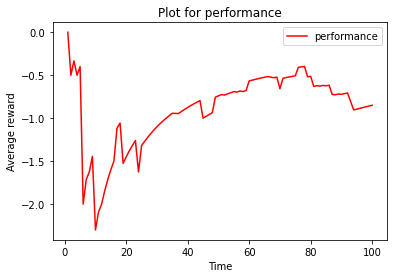

In [3]:
#1 Dynamic Control Task: Room Cleaner Robot
def room_cleaner_info(x_size, y_size):
  room = np.zeros([x_size, y_size])
  cnt = 0
  if (x_size * y_size < 10):
    print('Error: Not enough locations for dirt (atleast 10 are needed!)')
  while (cnt < 10 and cnt < x_size * y_size):
    x = np.random.randint(0, x_size)
    y = np.random.randint(0, y_size)
    if (room[x][y] == 0):
      room[x][y] = np.random.randint(1, 10)
      cnt += 1
  print('Room layout:\n', room)
  moves = ['left', 'right', 'up', 'down', 'pick dirt']
  info = np.zeros([100, 7])
  """
  Columns:
  0 - Move made 
  1 - Current x - position
  2 - Current y - position
  3 - Reward
  4 - Cumulative reward
  5 - Time
  6 - Dirt at the position
  """
  pos_x = np.random.randint(0, x_size)
  pos_y = np.random.randint(0, y_size)
  for i in range(100):
    choice = np.random.randint(0, 5)
    info[i][0] = choice
    info[i][1] = pos_x
    info[i][2] = pos_y
    info[i][3] = 0
    info[i][5] = i + 1
    info[i][6] = room[pos_x][pos_y]
    out_of_bounds = 0
    if (choice == 0):
      if (pos_x - 1 < 0):
        out_of_bounds = 1
      else:
        pos_x -= 1
    elif (choice == 1):
      if (pos_x + 1 == x_size):
        out_of_bounds = 1
      else:
        pos_x += 1
    elif (choice == 2):
      if (pos_y - 1 < 0):
        out_of_bounds = 1
      else:
        pos_y -= 1
    elif (choice == 3):
      if (pos_y + 1 == y_size):
        out_of_bounds = 1
      else:
        pos_y += 1
    elif (choice == 4):
      if (room[pos_x][pos_y] == 0):
        info[i][3] = -1
      else:
        info[i][3] = room[pos_x][pos_y]
        room[pos_x][pos_y] = 0
    if (out_of_bounds):
      info[i][3] = -10
    info[i][4] = info[i][3]
    if (i):
      info[i][4] += info[i - 1][4]
  print(info)
  plt.plot(info[:, 5], info[:, 4] / info[:, 5], 'r', label = 'performance')
  plt.title('Plot for performance')
  plt.xlabel('Time')
  plt.ylabel('Average reward')
  plt.legend()

print('Enter the dimensions of the room: ')
x, y = map(int, input().split())
room_cleaner_info(x, y)

Enter the number of timesteps:
1000
Enter the value of p_kid or 1 - p_adult
0.05
[[   1.            1.            4.69909231    0.            0.
     0.        ]
 [   2.            1.            5.31720816    0.            0.
     0.        ]
 [   3.            1.            5.68600673    1.            1.
     1.        ]
 ...
 [ 998.            1.            5.71075305    1.            1.
   504.        ]
 [ 999.            0.            3.68198597    1.            0.
   504.        ]
 [1000.            1.            5.11975824    0.            0.
   504.        ]]


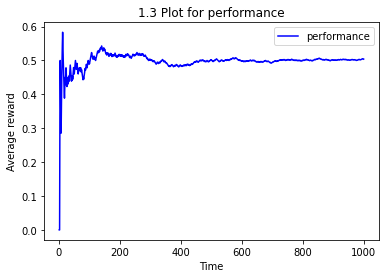

In [8]:
# Kids and Adults 1.1 and 1.3

kids = [1, 9, 0.5, 5, 4.5, 15, 0.8, 4.2, 13, 7, 22, 8, 10] #(heights = 2, 2.2, ... 4.4)
adults = [2, 6, 5, 12, 10, 19, 11, 5, 13, 7, 5, 3, 2] #custom distribution for adults (heights = 4.6, 4.8 ... 7.0)
kids_c = np.zeros([13])
adults_c = np.zeros([13])

h = []

for i in range(13):
  kids_c[i] = kids[i]
  adults_c[i] = adults[i]
  if (i):
    kids_c[i] += kids_c[i - 1]
    adults_c[i] += adults_c[i - 1]

def agent_info (t, p_kid):
  datafile = np.zeros([t, 6])
  for i in range(t):
    datafile[i][0] = i + 1
    num = np.random.uniform(0, 100)
    choice = np.random.uniform(0, 1) #choosing a kid vs. an adult
    if (choice < p_kid):
      height = 2.0 - np.random.uniform(0, 0.2)
      j = 0
      while (num > kids_c[j]):
        j += 1
        height += 0.2
      datafile[i][2] = height
    else:
      height = 4.6 - np.random.uniform(0, 0.2)
      j = 0
      while (num > adults_c[j]):
        j += 1
        height += 0.2
      datafile[i][2] = height
    h.append(datafile[i][2])
    if (datafile[i][2] > 4.4):
      datafile[i][1] = 1
    datafile[i][3] = np.random.randint(0, 2)
    if (datafile[i][1] == datafile[i][3]):
      datafile[i][4] = 1
    datafile[i][5] = datafile[i][4]
    if (i):
      datafile[i][5] += datafile[i - 1][5]
  """
  Columns:
  0 - Timestep
  1 - State
  2 - Height
  3 - Action
  4 - Reward
  5 - Cumulative reward
  """
  print(datafile)
  plt.plot(datafile[:, 0], datafile[:, 5] / datafile[:, 0], 'b', label = 'performance')
  plt.title('1.3 Plot for performance')
  plt.xlabel('Time')
  plt.ylabel('Average reward')
  plt.legend()
  
print('Enter the number of timesteps:')
t = int(input())
print('Enter the value of p_kid or 1 - p_adult')
p_kid = float(input())
agent_info(t, p_kid)

(array([  8.,   9.,   9.,  22.,  13., 101., 288., 244., 234.,  72.]),
 array([1.89740663, 2.40760765, 2.91780867, 3.42800969, 3.93821071,
        4.44841173, 4.95861275, 5.46881377, 5.97901479, 6.48921581,
        6.99941683]),
 <a list of 10 Patch objects>)

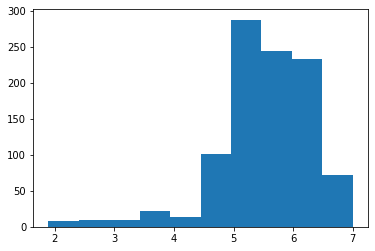

In [9]:
plt.hist(h)